In [53]:
import openpyxl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Generate the Data

In [54]:
# Loading the workbook
workbook = openpyxl.load_workbook("RollCall.xlsx")
sheet = workbook.active

In [55]:
sheet

<Worksheet "Sheet1">

In [56]:
last_row = sheet.max_row

# Insert empty cols to be populated
sheet.insert_cols(idx=2, amount=4)

# Populate them
for row in range(2, last_row + 1):
   height = round(np.random.normal(loc=5.6, scale=0.2), 2)
   weight = round(np.random.normal(loc=65, scale=10), 1)
   sheet.cell(row=row, column=2).value = height
   sheet.cell(row=row, column=3).value = weight

In [57]:
# Bins
height_bins = [5.4, 5.6, 5.8, 5.10, 6]
for row in range(2, last_row + 1):
    height = sheet.cell(row=row, column=2).value
    if height < height_bins[0]:
        sheet.cell(row=row, column=4).value = height_bins[0]
    elif height >= height_bins[-1]:
        sheet.cell(row=row, column=4).value = height_bins[-1]
    else:
        for i, bin_value in enumerate(height_bins):
            if height < bin_value:
                sheet.cell(row=row, column=4).value = bin_value
                break

weight_bins = [50, 60, 65, 70, 75]
for row in range(2, last_row + 1):
    weight = sheet.cell(row=row, column=3).value
    if weight < weight_bins[0]:
        sheet.cell(row=row, column=5).value = weight_bins[0]
    elif weight >= weight_bins[-1]:
        sheet.cell(row=row, column=5).value = weight_bins[-1]
    else:
        for i, bin_value in enumerate(weight_bins):
            if weight < bin_value:
                sheet.cell(row=row, column=5).value = bin_value - 5
                break

In [58]:
sheet.cell(row=1, column=2).value = "Height (ft)"
sheet.cell(row=1, column=3).value = "Weight (kg)"
sheet.cell(row=1, column=4).value = "Height Bin"
sheet.cell(row=1, column=5).value = "Weight Bin"

In [59]:
workbook.save("RollCall_New.xlsx")

# Plot the Height

<Axes: xlabel='Height (ft)', ylabel='Count'>

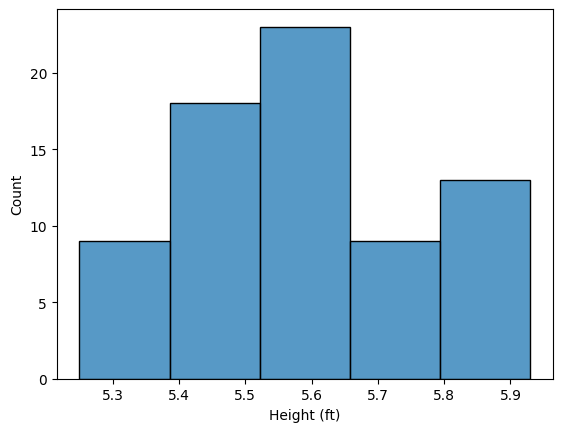

In [60]:
df = pd.read_excel("RollCall_New.xlsx")

# 2D Histogram
sns.histplot(df["Height (ft)"], bins=5)

# Plot the Weights

<Axes: xlabel='Weight (kg)', ylabel='Count'>

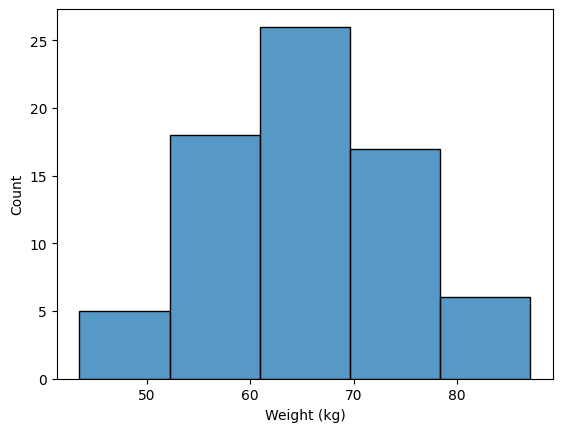

In [61]:
sns.histplot(df["Weight (kg)"], bins=5)

# Plot the Joint Distribution of Height and Weight

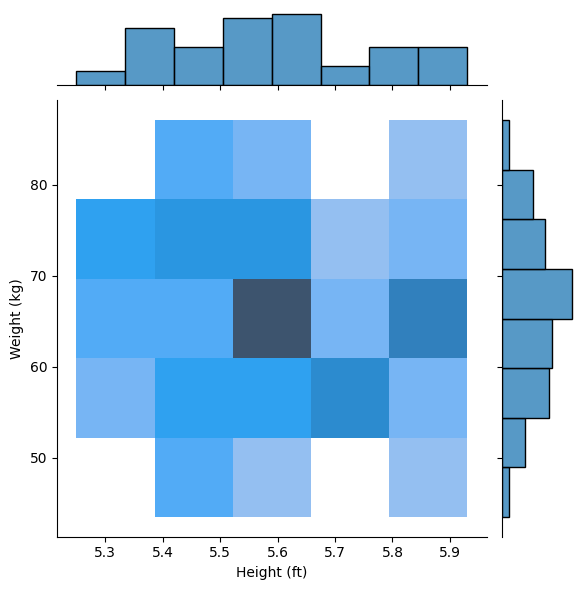

In [62]:
sns.jointplot(x="Height (ft)", y="Weight (kg)", data=df, kind='hist', bins=5)

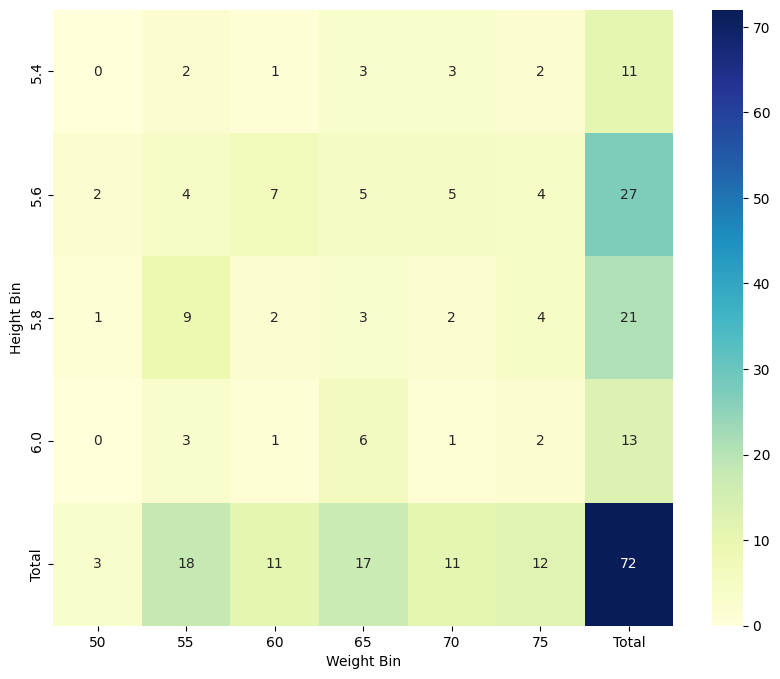

In [63]:
joint_distribution = pd.crosstab(df['Height Bin'], df['Weight Bin'], margins=True, margins_name='Total')

plt.figure(figsize=(10, 8))
sns.heatmap(joint_distribution, annot=True, cmap="YlGnBu", fmt='d', cbar=True)
plt.show()

# Statistical Parameters

1. Mean
2. Median
3. Mode
4. Standard deviation
5. Variance
6. Skew
7. Kurtosis

## For Height

In [64]:
mean_height = df['Height Bin'].mean()
median_height = df['Height Bin'].median()
mode_height = df['Height Bin'].mode()[0]
variance_height = df['Height Bin'].var()
std_height = df['Height Bin'].std()
skewness_height = df['Height Bin'].skew()
kurtosis_height = df['Height Bin'].kurtosis()

In [65]:
print("Mean Height:", mean_height)
print("Median Height:", median_height)
print("Mode Height:", mode_height)
print("Variance Height:", variance_height)
print("Standard Deviation Height:", std_height)
print("Skewness Height:", skewness_height)
print("Kurtosis Height:", kurtosis_height)

Mean Height: 5.699999999999999
Median Height: 5.6
Mode Height: 5.6
Variance Height: 0.037183098591549286
Standard Deviation Height: 0.19282919538168822
Skewness Height: 0.09698375116010616
Kurtosis Height: -0.9228068374313452


## For Weight

In [68]:
mean_weight = df['Weight Bin'].mean()
median_weight = df['Weight Bin'].median()
mode_weight = df['Weight Bin'].mode()[0]
variance_weight = df['Weight Bin'].var()
std_weight = df['Weight Bin'].std()
skewness_weight = df['Weight Bin'].skew()
kurtosis_weight = df['Weight Bin'].kurtosis()

In [69]:
print("Mean Weight:", mean_weight)
print("Median Weight:", median_weight)
print("Mode Weight:", mode_weight)
print("Variance Weight:", variance_weight)
print("Standard Deviation Weight:", std_weight)
print("Skewness Weight:", skewness_weight)
print("Kurtosis Weight:", kurtosis_weight)

Mean Weight: 63.541666666666664
Median Weight: 65.0
Mode Weight: 55
Variance Weight: 57.350352112676056
Standard Deviation Weight: 7.573001525991927
Skewness Weight: 0.0638017440387722
Kurtosis Weight: -1.152931291435825
